# Importing Libraries

In [9]:
import ipynb

In [10]:
import numpy as np
import tensorflow as tf
from ipynb.fs.full.parse_dataset import Crawler
import sys
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#TEST_SIZE =474
FEATURES = 25
OUTPUTS = 3

if __name__ == "__main__":
    n_input = 25 # MNIST data input (img shape: 28*28)
    n_treatments = 3 # MNIST total classes (0-9 digits)
    tf.compat.v1.disable_eager_execution()
    x = tf.compat.v1.placeholder("float", [None, n_input])
    y = tf.compat.v1.placeholder("float", [None, n_treatments])

# Data Extraction and preprocessing

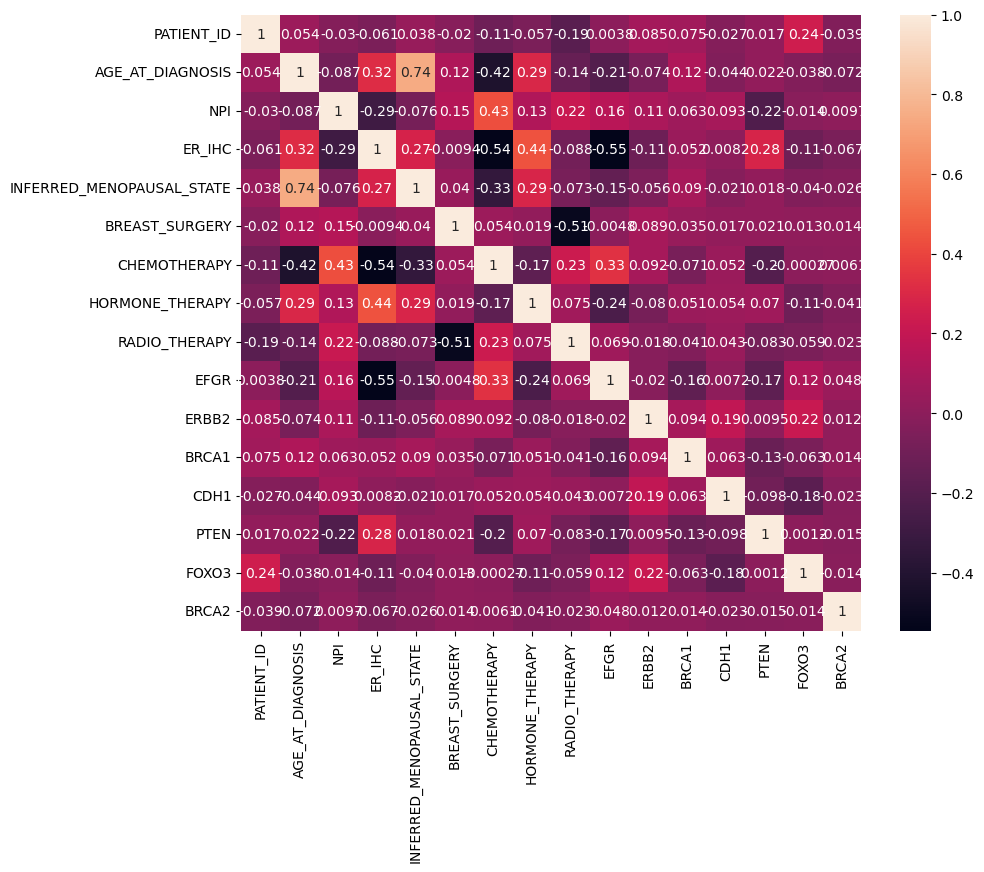

In [11]:
    objCrawler = Crawler("FinalCancer_Data.csv")
    data = objCrawler.parse_input()
    TEST_SIZE =  int(0.30 * len(data))

In [12]:
    max0 = np.amax(data[:, np.r_[0]])
    max1 = np.amax(data[:, np.r_[1]])
    max5 = np.amax(data[:, np.r_[5]])
    max6 = np.amax(data[:, np.r_[6]])
    max7 = np.amax(data[:, np.r_[7]])
    max8 = np.amax(data[:, np.r_[8]])
    max9 = np.amax(data[:, np.r_[9]])
    max10=np.amax(data[:, np.r_[10]])
    max11=np.amax(data[:, np.r_[11]])

    for dataElements in data:
        dataElements[0] = dataElements[0]/max0
        dataElements[1] = dataElements[1]/max1
        dataElements[5] = dataElements[5]/max5
        dataElements[6] = dataElements[6]/max6
        dataElements[7] = dataElements[7]/max7
        dataElements[8] = dataElements[8]/max8
        dataElements[9] = dataElements[9]/max9
        dataElements[10] = dataElements[10]/max10
        dataElements[11] = dataElements[11]/max11

# creating Train and Test data

In [17]:
    train_data, test_data = np.split(data, [len(data)-TEST_SIZE])
    
    testInput = data[:TEST_SIZE,:FEATURES]
    testOutput = data[:TEST_SIZE, -OUTPUTS:]

    trainInput = data[TEST_SIZE:, :FEATURES]
    trainOutput = data[TEST_SIZE:, -OUTPUTS:]

    train_size = len(trainInput)
    print(train_size)

1108


   # Construct model

In [38]:
    import keras
    from keras.models import Sequential
    from keras.layers import Dense

    classifier = Sequential()
    classifier.add(Dense(2056, activation='relu', kernel_initializer='uniform',input_dim=25))
    classifier.add(Dense(1024, activation='relu', kernel_initializer='uniform'))
    classifier.add(Dense(256, activation='relu', kernel_initializer='uniform'))
    classifier.add(Dense(3, activation='sigmoid', kernel_initializer='uniform'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(trainInput, trainOutput, batch_size = 10, epochs = 100,verbose=1 )

Train on 1108 samples
Epoch 1/100
1108/1108 [==============================] - 1s 1ms/sample - loss: 0.4244 - accuracy: 0.7885
Epoch 2/100
1108/1108 [==============================] - 1s 1ms/sample - loss: 0.3622 - accuracy: 0.8300
Epoch 3/100
1108/1108 [==============================] - 1s 1ms/sample - loss: 0.3537 - accuracy: 0.8436
Epoch 4/100
1108/1108 [==============================] - 2s 1ms/sample - loss: 0.3445 - accuracy: 0.8390
Epoch 5/100
1108/1108 [==============================] - 2s 1ms/sample - loss: 0.3426 - accuracy: 0.8448
Epoch 6/100
1108/1108 [==============================] - 1s 1ms/sample - loss: 0.3331 - accuracy: 0.8523
Epoch 7/100
1108/1108 [==============================] - 2s 1ms/sample - loss: 0.3282 - accuracy: 0.8523
Epoch 8/100
1108/1108 [==============================] - 1s 1ms/sample - loss: 0.3166 - accuracy: 0.8568
Epoch 9/100
1108/1108 [==============================] - 1s 1ms/sample - loss: 0.3178 - accuracy: 0.8616
Epoch 10/100
1108/1108 [=========

# Testing Model

In [39]:
y_pred = classifier.predict(testInput)
y_pred = (y_pred > 0.30)
print(y_pred)

[[False  True  True]
 [False  True  True]
 [ True  True  True]
 ...
 [False  True False]
 [False  True  True]
 [False  True  True]]


# Confusion Matrix

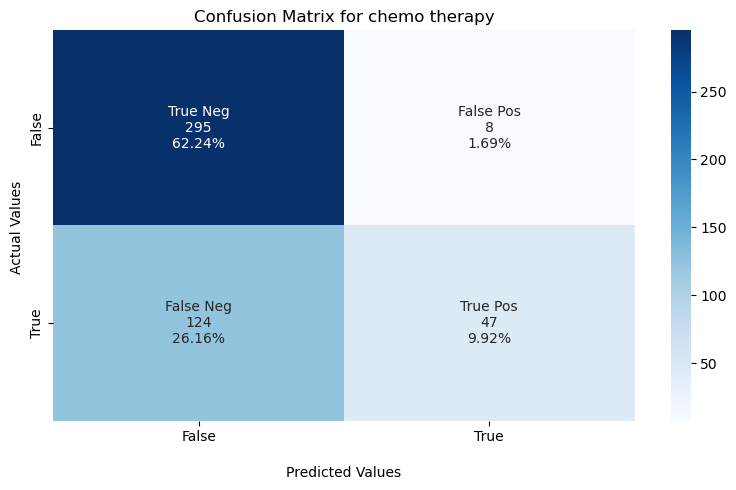

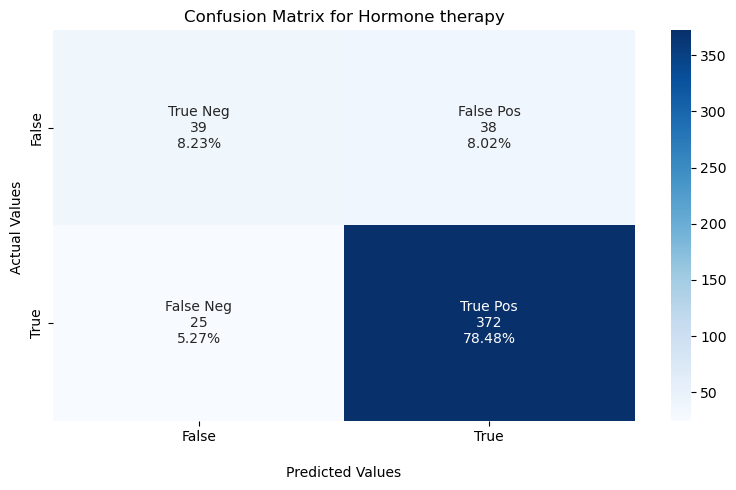

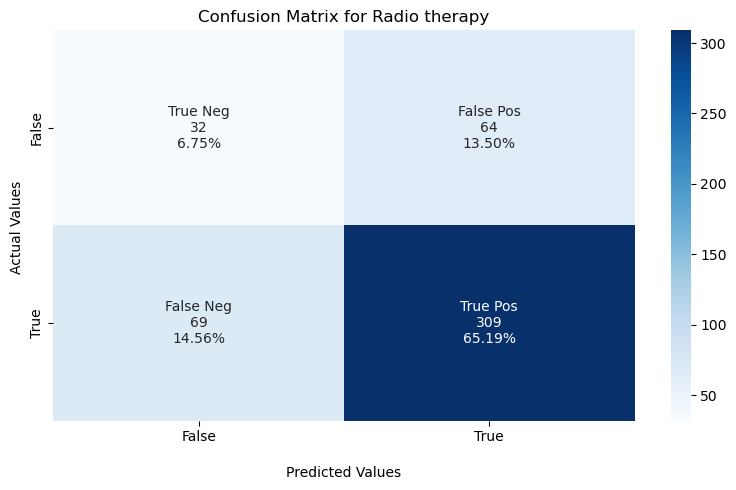

In [40]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix_A = multilabel_confusion_matrix(testOutput, y_pred)[0]
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts1 = ["{0:0.0f}".format(value) for value in
                confusion_matrix_A.flatten()]
group_percentages1 = ["{0:.2%}".format(value) for value in
                     confusion_matrix_A.flatten()/np.sum(confusion_matrix_A)]
labels1 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts1,group_percentages1)]
labels1 = np.asarray(labels1).reshape(2,2)
plt.figure(figsize=(8,5))
ax = sns.heatmap(confusion_matrix_A, annot=labels1, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for chemo therapy');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.tight_layout()  
plt.show()

confusion_matrix_B = multilabel_confusion_matrix(testOutput, y_pred)[1]
group_counts2 = ["{0:0.0f}".format(value) for value in
                confusion_matrix_B.flatten()]
group_percentages2 = ["{0:.2%}".format(value) for value in
                     confusion_matrix_B.flatten()/np.sum(confusion_matrix_B)]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts2,group_percentages2)]
labels2 = np.asarray(labels2).reshape(2,2)
plt.figure(figsize=(8,5))
ax = sns.heatmap(confusion_matrix_B, annot=labels2, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for Hormone therapy');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.tight_layout()
plt.show()

confusion_matrix_C = multilabel_confusion_matrix(testOutput, y_pred)[2]
group_counts3 = ["{0:0.0f}".format(value) for value in
                confusion_matrix_C.flatten()]
group_percentages3 = ["{0:.2%}".format(value) for value in
                     confusion_matrix_C.flatten()/np.sum(confusion_matrix_C)]
labels3 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts3,group_percentages3)]
labels3 = np.asarray(labels3).reshape(2,2)
plt.figure(figsize=(8,5))
ax = sns.heatmap(confusion_matrix_C, annot=labels3, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for Radio therapy');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.tight_layout()
plt.show()

# Testing Accuracy

In [41]:
  def Accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[1]):
        temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[1]
    
  Accuracy(testOutput, y_pred)

0.8888888888888888

# Precision, Recall, F1 Measure

In [42]:
def Precision(y_true, y_pred):#accuracy of positive predictions
    temp = 0
    for i in range(y_true.shape[0]):
        
        if sum(y_true[i]) == 0:
            continue
        temp+= sum(np.logical_and(y_true[i], y_pred[i]))/ sum(y_pred[i])
    return temp/ y_true.shape[0]
p = Precision(testOutput, y_pred)

def Recall(y_true, y_pred): #completeness of positive predictions
    temp = 0
    for i in range(y_true.shape[0]):
        if sum(y_pred[i]) == 0:
            continue
        temp+= sum(np.logical_and(y_true[i], y_pred[i]))/ sum(y_true[i])
    return temp/ y_true.shape[0]
r = Recall(testOutput,y_pred)

def F1Measure(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        if (sum(y_true[i]) == 0) and (sum(y_pred[i]) == 0):
            continue
        temp+= (2*sum(np.logical_and(y_true[i], y_pred[i])))/ (sum(y_true[i])+sum(y_pred[i]))
    return temp/ y_true.shape[0]
    
F1 = F1Measure(testOutput, y_pred)

print ("Precision = ",end="")
print ('%.3f'%p)
print ("Recall = ",end="")
print ('%.3f'%r)
print ("F1 Measure = ",end="")
print ('%.3f'%F1)


Precision = 0.804
Recall = 0.882
F1 Measure = 0.806


# Classification report

In [43]:
from sklearn.metrics import classification_report
label_names = ['CHEMO_THERAPY', 'HORMONE_THERAPY', 'RADIO_THERAPY']
print(classification_report(testOutput, y_pred,target_names=label_names))

                 precision    recall  f1-score   support

  CHEMO_THERAPY       0.85      0.27      0.42       171
HORMONE_THERAPY       0.91      0.94      0.92       397
  RADIO_THERAPY       0.83      0.82      0.82       378

      micro avg       0.87      0.77      0.82       946
      macro avg       0.86      0.68      0.72       946
   weighted avg       0.87      0.77      0.79       946
    samples avg       0.88      0.80      0.81       946



# Prediction for single instance

In [47]:
y1 = classifier.predict(testInput[46:48])
y1 = (y1 > 0.3)
for i in range(len(y1)):
    for j in range(len(y1[i])):
        if j == 0:
            if y1[i][j] == True:
                print("CHEMOTHERAPY",end=",")
        if j == 1:
            if y1[i][j] == True:
                print("HORMONE THERAPY",end=",")
        if j == 2:
            if y1[i][j] == True:
                print("RADIO THERAPY",end=",")
    print()

HORMONE THERAPY,
HORMONE THERAPY,RADIO THERAPY,
